Теория
https://docs.google.com/document/d/1w66joyUgMUQlMCXqrtl-nnYdd2vHQ3qdwdwmjotyNcI/edit?usp=sharing

брать данные отсюда: https://books.toscrape.com/

1. Напишите функцию, которая парсит одну страницу с книгой. Функция принимает на вход URL, возвращает словарь со всей информацией о книге (включая количество звездочек, ссылку на изображение, доступное количество и жанр). В случае 404 ошибки возбудите `ValueError`.
2. Напишите функцию, которая обрабатывает одну страницу из каталога книг (возвращает список словарей по каждой из книг).
3. Создайте массив NumPy, содержащий информацию о ценах книг. Магазин вводит скидку 15% на все книги. Найдите минимальную цену книги после введения скидки.
4. Создайте массив NumPy, содержащий информацию о количестве книг. Посчитайте общую выручку, которую магазин получит, продав все книги.
5. Создайте массив NumPy с закодированными значениями жанра. Магазин вводит скидку на каждый жанр по отдельности. Создайте массив NumPy со значениями скидок (размер массива зависит от количества жанров в выборке). Примените скидку к каждой книге в зависимости от жанра.
6. Соберите словарь вида `{жанр: список книг жанра}`. Сохраните словарь в формат JSON. Прочитайте файл.
7. Соберите кортеж из двух элементов (список книг, облагаемых налогами; список книг, не облагаемых налогами). Сохраните кортеж в формат Pickle. Считайте файл.
8. Создайте `pd.DataFrame`, содержащий всю полученную информацию о книгах. Сохраните его в файл `.xlsx`.
9. При помощи `xlwings` добавьте в `.xlsx` файл столбец с ценой в рублях. Используйте протягиваемые формулы. Курс зафиксируйте на отдельном листе.
10. При помощи `xlwings` раскрасьте столбец с названием книги. Если в наличии более 20 книг, сделайте заливку зеленым, иначе — желтым.
11. Напишите функцию, которая извлекает из текстов описаний имена собственные. Имя собственное — это слово, начинающееся с заглавной буквы и за которым следует одна или несколько строчных букв.
12. Представьте каждое описание в виде вектора при помощи `TfidfVectorizer`. Для каждой пары описаний посчитайте косинусную близость между ними. Визуализируйте результат в виде heatmap.
13. Найдите собственные числа матрицы косинусной близости. Найдите разность между максимальным и минимальным собственным значением.
14. Используя `pandas`, найдите самую дорогую книгу в каждом из жанров.
15. Используя `pandas`, разбейте книги на 3 ценовые категории. Для каждой категории посчитайте количество книг с разбивкой по рейтингам.
16. Сохраните данные о книгах в БД `sqlite3`. Напишите функцию, которая по введенному пользователем названию жанра возвращает кол-во книг в этом жанре.
17. Напишите функцию, которая добавляет новую запись в таблицу. Продемонстрируйте результат.
18. Воспользовавшись модулем `multiprocessing`, соберите информацию о всех книгах с сайта (распараллельте вычисления по страницам каталога).
19. Воспользовавшись `dask.delayed`, скачайте изображения книг с сайта (распараллельте вычисления по страницам каталога). Использование Dask должно приводить к истинной параллельной обработке данных.
20. Сохраните информацию о книгах в формате JSONL с разбивкой на файлы по жанрам.
21. Считайте данные в виде `Dask Bag`. Посчитайте, для скольких книг описание имеет больше 10 предложений. Выполните задание с использованием `dask.bag`, распараллелив процесс обработки данных.
22. Сохраните данные о книгах в виде нескольких CSV-файлов. Считайте их в виде `Dask DataFrame`. Выясните, есть ли в датасете книги, на которые оставили хоть один отзыв.
23. Посчитайте кол-во обложек книг, которые по ширине больше, чем по длине. Разбейте весь набор файлов на 4 группы и выполните обработку в 4 процесса.

#imports

In [ ]:
import requests as req
from bs4 import BeautifulSoup as bs
import pandas as pd
import pickle

#БИЛЕТЫ

## 1
Напишите функцию, которая парсит одну страницу с книгой. Функция принимает на вход URL, возвращает словарь со всей информацией о книге (включая количество звездочек, ссылку на изображение, доступное количество и жанр). В случае 404 ошибки возбудите `ValueError`.

In [ ]:
import requests
from bs4 import BeautifulSoup

def parse_book(url):
    response = requests.get(url)
    if response.status_code == 404:
        raise ValueError(f"Страница не найдена: {url}")

    soup = BeautifulSoup(response.content, 'html.parser')
    product = soup.find(class_='product_main')

    return {
        'title': product.h1.text,
        'price': product.find(class_='price_color').text,
        'stars': product.find(class_='star-rating')['class'][1],
        'image': soup.find('div', class_='item').img['src'],
        'stock': product.find(class_='availability').text.strip(),
        'genre': soup.find(class_='breadcrumb').find_all('a')[2].text,
        'description': soup.find('meta', attrs={'name': 'description'})['content'].strip()
    }

In [ ]:
parse_book("http://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html")

{'title': 'A Light in the Attic',
 'price': '£51.77',
 'stars': 'Three',
 'image': '../../media/cache/fe/72/fe72f0532301ec28892ae79a629a293c.jpg',
 'stock': 'In stock (22 available)',
 'genre': 'Poetry',
 'description': "It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof o

##2
Напишите функцию, которая обрабатывает одну страницу из каталога книг (возвращает список словарей по каждой из книг).

In [ ]:
import requests
from bs4 import BeautifulSoup

def parse_catalogue_page(url):
    response = requests.get(url)
    if response.status_code == 404:
        raise ValueError(f"Страница не найдена: {url}")

    soup = BeautifulSoup(response.content, 'html.parser')
    books_data = []

    for book in soup.find_all('article', class_='product_pod'):
        books_data.append({
            'title': book.h3.a['title'],
            'price': book.find(class_='price_color').text,
            'stars': book.find(class_='star-rating')['class'][1],
            'url': book.h3.a['href'],
            'image_url': book.find('img')['src']
        })

    return books_data

In [ ]:
parse_catalogue_page("https://books.toscrape.com/")[:3]

[{'title': 'A Light in the Attic',
  'price': '£51.77',
  'stars': 'Three',
  'url': 'catalogue/a-light-in-the-attic_1000/index.html',
  'image_url': 'media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg'},
 {'title': 'Tipping the Velvet',
  'price': '£53.74',
  'stars': 'One',
  'url': 'catalogue/tipping-the-velvet_999/index.html',
  'image_url': 'media/cache/26/0c/260c6ae16bce31c8f8c95daddd9f4a1c.jpg'},
 {'title': 'Soumission',
  'price': '£50.10',
  'stars': 'One',
  'url': 'catalogue/soumission_998/index.html',
  'image_url': 'media/cache/3e/ef/3eef99c9d9adef34639f510662022830.jpg'}]

##3

Создайте массив NumPy, содержащий информацию о ценах книг. Магазин вводит скидку 15% на все книги. Найдите минимальную цену книги после введения скидки.

In [ ]:
# Код собирает данные только с первой страницы сайта
import requests as req
from bs4 import BeautifulSoup as bs
import numpy as np

response = req.get('https://books.toscrape.com/')
soup = bs(response.content, 'html.parser')
prices_list = []

# Находим все элементы с ценой
price_elements = soup.find_all('p', class_ = 'price_color')

for element in price_elements:
    price = float(element.text.replace('£', ''))
    prices_list.append(price)

prices_array = np.array(prices_list)
discounted_prices = prices_array * 0.85
min_price = np.min(discounted_prices)

print(f"Минимальная цена после скидки 15%: £{min_price:.2f}")

##4
Создайте массив NumPy, содержащий информацию о количестве книг. Посчитайте общую выручку, которую магазин получит, продав все книги.

In [ ]:
# Код собирает данные только с первой страницы сайта
import requests as req
from bs4 import BeautifulSoup as bs
import numpy as np
import re

response = req.get('https://books.toscrape.com/')
soup = bs(response.content, 'html.parser')

prices_list = []
quantities_list = []

books = soup.find_all('article', class_ = 'product_pod')
print(f"Сбор данных о {len(books)} книгах. Пожалуйста, подождите...")

for book in books:
    # Получаем цену
    price = float(book.find('p', class_ = 'price_color').text.replace('£', ''))
    prices_list.append(price)

    # Получаем количество (заходим на страницу книги)
    relative_link = book.find('h3').find('a')['href']
    full_link = 'https://books.toscrape.com/' + ('catalogue/' + relative_link if 'catalogue' not in relative_link else relative_link) # Корректируем ссылку, если она неполная
    product_response = req.get(full_link)
    product_soup = bs(product_response.content, 'html.parser')

    # Ищем текст "In stock (X available)"
    availability_text = product_soup.find('p', class_ = 'instock availability').text

    # Извлекаем число с помощью регулярного выражения
    qty = int(re.search(r'\((\d+)', availability_text).group(1))
    quantities_list.append(qty)

prices_array = np.array(prices_list)
quantities_array = np.array(quantities_list)
total_revenue = np.sum(prices_array * quantities_array)

print(f"Общая выручка: £{total_revenue:.2f}")

##5
Создайте массив NumPy с закодированными значениями жанра. Магазин вводит скидку на каждый жанр по отдельности. Создайте массив NumPy со значениями скидок (размер массива зависит от количества жанров в выборке). Примените скидку к каждой книге в зависимости от жанра.

In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import time
from urllib.parse import urljoin

def get_all_books_data(base_url="https://books.toscrape.com/"):
    session = requests.Session()
    response = session.get(base_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 1. Получаем ссылки на все категории (жанры) из боковой панели
    # Игнорируем первую ссылку "Books", так как это общий каталог
    category_links = soup.select('.side_categories > ul > li > ul > li > a')

    titles = []
    prices = []
    genres = []

    print(f"Найдено {len(category_links)} категорий. Начинаем сбор ВСЕХ книг...")

    # Проходим по каждой категории
    for cat_link in category_links:
        genre_name = cat_link.text.strip()
        relative_url = cat_link['href']
        current_url = urljoin(base_url, relative_url)

        while True:
            # Загружаем страницу
            cat_response = session.get(current_url)
            cat_soup = BeautifulSoup(cat_response.text, 'html.parser')

            # Собираем книги на текущей странице
            books = cat_soup.select('article.product_pod')

            for book in books:
                # Название (оно в атрибуте title тега a внутри h3)
                title = book.h3.find('a')['title']

                # Цена
                price_text = book.find('p', class_='price_color').text
                price = float(price_text[2:])

                titles.append(title)
                prices.append(price)
                genres.append(genre_name)

            # Проверяем, есть ли кнопка "next" (пагинация внутри категории)
            next_button = cat_soup.select_one('li.next > a')

            if next_button:
                # Формируем ссылку на следующую страницу категории
                next_page_url = next_button['href']
                current_url = urljoin(current_url, next_page_url)
            else:
                # Если страниц в категории больше нет, выходим из цикла while
                break

    return np.array(titles), np.array(prices), np.array(genres)

In [ ]:
# 1. Парсинг
titles_arr, prices_arr, genres_arr_text = get_all_books_data()

print(f"\n--- Парсинг завершен! ---")
print(f"Всего найдено книг: {len(titles_arr)}") # Должно быть ровно 1000

# 2. NumPy: Кодирование жанров
unique_genres, genre_indices = np.unique(genres_arr_text, return_inverse=True)

print(f"Количество уникальных жанров: {len(unique_genres)}")

# 3. NumPy: Генерация скидок и их применение
np.random.seed(42)
discounts_per_genre = np.round(np.random.uniform(0.05, 0.35, size=len(unique_genres)), 2)

applied_discounts = discounts_per_genre[genre_indices]

# Рассчитываем итоговую цену
final_prices = np.round(prices_arr * (1 - applied_discounts), 2)

# 4. Формирование таблицы результатов
df = pd.DataFrame({
    'Название': titles_arr,
    'Жанр': genres_arr_text,
    'Цена (исх.)': prices_arr,
    'Скидка': applied_discounts,
    'Цена (со скидкой)': final_prices
})
df['Скидка'] = (df['Скидка'] * 100).astype(int).astype(str) + '%'

# Вывод
print("\n--- Итоговая таблица (первые и последние 5 записей) ---")
pd.set_option('display.max_rows', 20) # Настройка отображения
pd.set_option('display.max_columns', 5)
pd.set_option('display.width', 1000)

print(df)

##6
Соберите словарь вида {жанр: список книг жанра}. Сохраните словарь в формат JSON. Прочитайте файл.

In [ ]:
import json

genre_dict = {}

for genre, title in zip(genres_arr_text, titles_arr):
    if genre not in genre_dict:
        genre_dict[genre] = []
    genre_dict[genre].append(title)

# 2. Сохраняем словарь в файл
filename = "books_data.json"
with open(filename, "w", encoding="utf-8") as f:
    json.dump(genre_dict, f, ensure_ascii=False, indent=4)
print(f"Словарь успешно сохранен в файл '{filename}'")

# 3. Читаем файл обратно
with open(filename, "r", encoding="utf-8") as f:
    loaded_data = json.load(f)

# Проверка: выведем количество жанров и пример одного из них
print(f"Прочитано из файла жанров: {len(loaded_data)}")
example_genre = list(loaded_data.keys())[0]
print(f"Пример (жанр '{example_genre}'): {loaded_data[example_genre][:3]} ...")

##7
Соберите кортеж из двух элементов (список книг, облагаемых налогами; список книг, не облагаемых налогами). Сохраните кортеж в формат Pickle. Считайте файл.

In [ ]:
import pickle
import requests as req
from bs4 import BeautifulSoup as bs

def get_data(url):
    base = "https://books.toscrape.com/catalogue/"
    res = req.get(url)
    soup = bs(res.content, "lxml")
    books = []

    for a in soup.select("h3 a"): # h3 <=> заголовок третьего уровня (3 это уровень для карточек товаров на books.toscrape), a <=> anchor <=> тэг ссылки ("содержимое"; в содержимом будет ссылка, по ней и перейдем)
        link = base + a["href"].replace("catalogue/", "") # href <=> hypertext reference <=> url-адрес (ссылка)
        b_res = req.get(link)
        b_soup = bs(b_res.content, "lxml")

        rows = {tr.th.text: tr.td.text for tr in b_soup.find_all("tr")} # tr <=> table row <=> строка в таблице ; th <=> table header <=> заголовок
        info = {
            "title": b_soup.h1.text,
            "price_excl": float(rows["Price (excl. tax)"][1:]),
            "tax": float(rows["Tax"][1:]),
            "stock": rows["Availability"]
        }
        books.append(info)
    return books

raw = get_data("https://books.toscrape.com/index.html")

#список книг, облагаемых налогами;
taxable = [b for b in raw if b["tax"] > 0]
#список книг, не облагаемых налогами
non_taxable = [b for b in raw if b["tax"] == 0]

#Соберите кортеж из двух элементов
tup = (taxable, non_taxable)

#Сохраните кортеж в формат Pickle.
with open("data.pkl", "wb") as f:
    pickle.dump(tup, f)

#Считайте файл
with open("data.pkl", "rb") as f:
    loaded = pickle.load(f)

##8
Создайте pd.DataFrame, содержащий всю полученную информацию о книгах. Сохраните его в файл .xlsx.

In [ ]:
#Создайте pd.DataFrame, содержащий всю полученную информацию о книгах.
df = pd.DataFrame(raw)
#Сохраните его в файл .xlsx.
df.to_excel("books.xlsx", index=False)



##9

При помощи xlwings добавьте в .xlsx файл столбец с ценой в рублях. Используйте протягиваемые формулы. Курс зафиксируйте на отдельном листе.

**WARNING!**

xlwings не работает напрямую в Google Colab! Он связывается с уже запущенным приложением Excel на вашей машине (Windows/macOS) для автоматизации, чего нет в виртуальной среде Colab.

Если что, работаем через старый добрый юпитер.

In [ ]:
import xlwings
import re

In [ ]:
file_name = "books.xlsx"

app = xw.App(visible=False)
wb = xw.Book(file_name)
sheet = wb.sheets[0]

if "Курс" not in [s.name for s in wb.sheets]:
    ws_settings = wb.sheets.add("Курс")
else:
    ws_settings = wb.sheets["Курс"]

exchange_rate = 104.2
ws_settings.range("A1").value = "Курс Фунт/Рубль"
ws_settings.range("B1").value = exchange_rate

last_row = sheet.range("A1").expand().last_cell.row
sheet.range("E1").value = "Price_RUB"
formula = "=(B2+C2)*Курс!$B$1"
sheet.range(f"E2:E{last_row}").formula = formula

sheet.autofit()

wb.save()
wb.close()
app.quit()

# 10

При помощи xlwings раскрасьте столбец с названием книги. Если в наличии более 20 книг, сделайте заливку зеленым, иначе — желтым.

In [ ]:
file_name = "books.xlsx"

app = xw.App(visible=False)
wb = xw.Book(file_name)
sheet = wb.sheets[1]

last_row = sheet.range("A1").expand().last_cell.row
titles = sheet.range(f"A2:A{last_row}")
stocks = sheet.range(f"D2:D{last_row}").value

for i, stock_text in enumerate(stocks):
    print(stock_text)

    match = re.search(r'\d+', stock_text)

    if match:
        quantity = int(match.group())
        cell = sheet.range(f"A{i+2}")

        if quantity > 20:
            cell.color = (144, 238, 144)
        else:
            cell.color = (255, 255, 0)

wb.save()
wb.close()
app.quit()

## 11
Напишите функцию, которая извлекает из текстов описаний имена собственные. Имя собственное — это слово, начинающееся с заглавной буквы и за которым следует одна или несколько строчных букв.

In [ ]:
# !!! эта функция взята из задания 1 для того, чтобы спарсить описания книг
import requests
from bs4 import BeautifulSoup

def parse_book(url):
    response = requests.get(url)
    if response.status_code == 404:
        raise ValueError(f"Страница не найдена: {url}")

    soup = BeautifulSoup(response.content, 'html.parser')
    product = soup.find(class_='product_main')

    return {
        'title': product.h1.text,
        'price': product.find(class_='price_color').text,
        'stars': product.find(class_='star-rating')['class'][1],
        'image': soup.find('div', class_='item').img['src'],
        'stock': product.find(class_='availability').text.strip(),
        'genre': soup.find(class_='breadcrumb').find_all('a')[2].text,
        'description': soup.find('meta', attrs={'name': 'description'})['content'].strip()
    }

# ------------------------------------------------------------------------------
# можно взять другие адреса книг, это первые 4
urls = [
    'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
    'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
    'https://books.toscrape.com/catalogue/soumission_998/index.html',
    'https://books.toscrape.com/catalogue/sharp-objects_997/index.html'
]
# описания этих книг
descriptions = [parse_book(url)['description'] for url in urls]


import re

def extract_proper_nouns(text):
    # \b обозначает границу слова, чтобы избежать частичных совпадений внутри слов.
    # [A-Z] - заглавная буква, [a-z]+ - одна или несколько строчных букв.
    proper_nouns = re.findall(r'\b[A-Z][a-z]+\b', text)
    return proper_nouns

proper_nouns = [extract_proper_nouns(d) for d in descriptions]

for i, text in enumerate(descriptions):
    print(f"Текст {i+1}:\n{text}")
    print(f"Найденные имена собственные:\n{proper_nouns[i]}\n")
    print("=" * 100, end='\n\n')

Текст 1:
It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love th It's hard to imagine a world without A Light in the Attic. This now-classic collection of poetry and drawings from Shel Silverstein celebrates its 20th anniversary with this special edition. Silverstein's humorous and creative verse can amuse the dowdiest of readers. Lemon-faced adults and fidgety kids sit still and read these rhythmic words and laugh and smile and love that Silverstein. Need proof of his genius? RockabyeRockabye baby, in the treetopDon't you know a treetopIs no safe place to rock?And who put you up there,And your cradle, too?Baby, I think someone down here'sGot it in for you. Shel, you neve

## 12
Представьте каждое описание в виде вектора при помощи TfidfVectorizer. Для каждой пары описаний посчитайте косинусную близость между ними. Визуализируйте результат в виде heatmap.

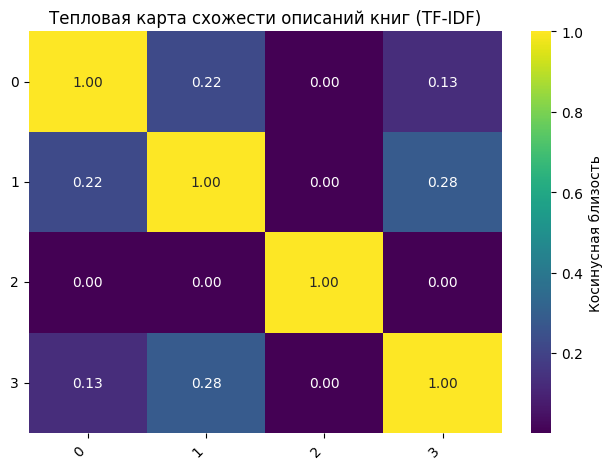

In [ ]:
# !!! эта функция взята из задания 1 для того, чтобы спарсить описания книг
import requests
from bs4 import BeautifulSoup

def parse_book(url):
    response = requests.get(url)
    if response.status_code == 404:
        raise ValueError(f"Страница не найдена: {url}")

    soup = BeautifulSoup(response.content, 'html.parser')
    product = soup.find(class_='product_main')

    return {
        'title': product.h1.text,
        'price': product.find(class_='price_color').text,
        'stars': product.find(class_='star-rating')['class'][1],
        'image': soup.find('div', class_='item').img['src'],
        'stock': product.find(class_='availability').text.strip(),
        'genre': soup.find(class_='breadcrumb').find_all('a')[2].text,
        'description': soup.find('meta', attrs={'name': 'description'})['content'].strip()
    }

# ------------------------------------------------------------------------------
# можно взять другие адреса книг, это первые 4
urls = [
    'https://books.toscrape.com/catalogue/a-light-in-the-attic_1000/index.html',
    'https://books.toscrape.com/catalogue/tipping-the-velvet_999/index.html',
    'https://books.toscrape.com/catalogue/soumission_998/index.html',
    'https://books.toscrape.com/catalogue/sharp-objects_997/index.html'
]
# описания этих книг
descriptions = [parse_book(url)['description'] for url in urls]


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer()  # можно на своё усмотрение настроить (например, добавит stop_words='english'), см. документацию или gemini
tfidf_matrix = tfidf.fit_transform(descriptions)

cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

sns.heatmap(
    cosine_sim,
    annot=True,
    fmt=".2f",
    cmap='viridis',
    cbar_kws={'label': 'Косинусная близость'}
)

plt.title('Тепловая карта схожести описаний книг (TF-IDF)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Чем больше косинусная похожесть, тем больше текст похожи между собой

## 13

Найдите собственные числа матрицы косинусной близости. Найдите разность между максимальным и минимальным собственным значением.

In [ ]:
import numpy as np

def eig_diff(data_matrix):
    norms = np.linalg.norm(data_matrix, axis=1, keepdims=True)

    # деление на ноль
    norms[norms == 0] = 1e-10
    norm_data = data_matrix / norms

    # косинусная близость = скалярное произведение нормированных векторов
    mat = np.dot(norm_data, norm_data.T)

    eigenvalues = np.linalg.eigvalsh(mat)

    max_eig = np.max(eigenvalues)
    min_eig = np.min(eigenvalues)

    return max_eig - min_eig

X = np.random.rand(10, 5)
res = eig_diff(X)
print(res)

8.182030298893624


## 14
Используя `pandas`, найдите самую дорогую книгу в каждом из жанров.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urljoin
import time

def solve_books_scraper():
    base_url = "http://books.toscrape.com/"
    response = requests.get(base_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # список жанров
    genre_links = soup.select('.side_categories > ul > li > ul > li > a')

    all_books_data = []

    for link in genre_links:
        genre_name = link.text.strip()

        current_url = base_url + link.get('href')

        # ходим по каждому каталогу с книгами
        while True:
            try:
                r = requests.get(current_url)
                s = BeautifulSoup(r.text, 'html.parser')
                # получаем все книги
                articles = s.find_all('article', class_='product_pod')
                # парсим
                for article in articles:
                    title = article.h3.a['title']
                    price_text = article.find('p', class_='price_color').text
                    price = float(price_text[2:].strip())

                    all_books_data.append({
                        'Genre': genre_name,
                        'Title': title,
                        'Price': price
                    })

                # смотрим можно ли перейти на следующую страницу
                next_li = s.find('li', class_='next')
                if next_li:
                    next_url_rel = next_li.find('a')['href']
                    current_url = current_url + '/' + next_url_rel
                else:
                    break

            except Exception as e:
                print(f"Ошибка при обработке {current_url}: {e}")
                break

    # Выполнение самого задания :(
    df = pd.DataFrame(all_books_data)
    idx_max = df.groupby('Genre')['Price'].idxmax()
    result = df.loc[idx_max].sort_values(by='Price', ascending=False)

    return result

df_results = solve_books_scraper()
df_results.head()

,Genre,Title,Price
118,Romance,The Perfect Play (Play by Play #1),59.99
372,Psychology,Civilization and Its Discontents,59.95
481,Thriller,The Bone Hunters (Lexy Vaughan & Steven Macaul...,59.71
416,History,Thomas Jefferson and the Tripoli Pirates: The ...,59.64
25,Mystery,Boar Island (Anna Pigeon #19),59.48


# 15

Используя `pandas`, разбейте книги на 3 ценовые категории. Для каждой категории посчитайте количество книг с разбивкой по рейтингам.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

rating_map = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}

base_url = "https://books.toscrape.com/"

# Сначала определим общее число страниц
response = requests.get(base_url)
response.raise_for_status()
soup = BeautifulSoup(response.text, 'html.parser')

# Находим ссылку на последнюю страницу (если есть)
pager = soup.select_one('ul.pager li.current')
if pager:
    # Пример текста: "Page 1 of 50"
    total_pages = int(pager.text.strip().split()[-1])
else:
    total_pages = 1  # если только одна страница

print(f"Всего страниц: {total_pages}")

all_books = []

for page in range(1, total_pages + 1):
    if page == 1:
        url = base_url
    else:
        url = f"https://books.toscrape.com/catalogue/page-{page}.html"

    response = requests.get(url)
    response.raise_for_status()
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.select('article.product_pod')

    for book in books:
        title = book.h3.a['title']
        price = book.select_one('p.price_color').text
        availability = book.select_one('p.instock.availability').text.strip()
        star_rating_tag = book.select_one('p.star-rating')
        rating_word = star_rating_tag['class'][1]
        rating = rating_map[rating_word]

        all_books.append({
            'Title': title,
            'Price': price.replace('Â£', ''),
            'Availability': availability,
            'Rating': rating
        })

# Создаём DataFrame
df = pd.DataFrame(all_books)
df['Price'] = df['Price'].astype(float)

print(f"\nВсего книг собрано: {len(df)}")
df.head()

Всего страниц: 50

Всего книг собрано: 1000


,Title,Price,Availability,Rating
0,A Light in the Attic,51.77,In stock,3
1,Tipping the Velvet,53.74,In stock,1
2,Soumission,50.10,In stock,1
3,Sharp Objects,47.82,In stock,4
4,Sapiens: A Brief History of Humankind,54.23,In stock,5


In [ ]:
df['Price_Category'] = pd.qcut(df['Price'], q=3, labels=['Low', 'Medium', 'High'])

# Подсчёт количества книг по категориям и рейтингам
pivot = df.groupby(['Price_Category', 'Rating']).size().unstack(fill_value=0)

# Вывод результата
print("Количество книг по ценовым категориям и рейтингам:")
pivot

Количество книг по ценовым категориям и рейтингам:


/tmp/ipython-input-2256628506.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot = df.groupby(['Price_Category', 'Rating']).size().unstack(fill_value=0)


Rating,1,2,3,4,5
Price_Category,,,,,
Low,78,62,68,59,67
Medium,80,73,66,56,58
High,68,61,69,64,71


# 16

Сохраните данные о книгах в БД `sqlite3`. Напишите функцию, которая по введенному пользователем названию жанра возвращает кол-во книг в этом жанре.

In [ ]:
import requests
from bs4 import BeautifulSoup
import sqlite3
from urllib.parse import urljoin

def scrape_and_store_books():
    base_url = "http://books.toscrape.com/"
    response = requests.get(base_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Получаем все жанры из сайдбара
    genre_links = soup.select('.side_categories ul li a')

    # Подключаемся к БД (в памяти или файловой — как хотите)
    conn = sqlite3.connect("books.db")  # или ":memory:" для временной БД
    cursor = conn.cursor()
    cursor.execute("DROP TABLE IF EXISTS books")
    cursor.execute("""
        CREATE TABLE books (
            title TEXT,
            genre TEXT,
            price REAL
        )
    """)
    conn.commit()

    for link in genre_links:
        genre_name = link.text.strip()
        genre_url = urljoin(base_url, link['href'])
        current_url = genre_url

        while True:
            r = requests.get(current_url)
            s = BeautifulSoup(r.text, 'html.parser')

            for article in s.select('article.product_pod'):
                title = article.h3.a['title']
                price_text = article.select_one('p.price_color').text
                price = float(price_text[1:].replace('£', '').strip())  # £10.99 → 10.99

                cursor.execute("INSERT INTO books VALUES (?, ?, ?)", (title, genre_name, price))

            # Проверка пагинации
            next_link = s.select_one('li.next a')
            if next_link:
                current_url = urljoin(current_url, next_link['href'])
            else:
                break

    conn.commit()
    conn.close()

# Выполняем парсинг и сохранение
scrape_and_store_books()

# Функция: сколько книг в заданном жанре?
def count_books_by_genre(genre: str) -> int:
    conn = sqlite3.connect("books.db")
    cursor = conn.cursor()
    cursor.execute("SELECT COUNT(*) FROM books WHERE genre = ?", (genre,))
    count = cursor.fetchone()[0]
    conn.close()
    return count

# Пример использования:
print(count_books_by_genre("Mystery"))        # например: 5
print(count_books_by_genre("Science Fiction"))  # например: 11

32
16


## 17

Напишите функцию, которая добавляет новую запись в таблицу. Продемонстрируйте результат

(судя по контексту прошлого задания, речь о таблице в БД sqlite3?..)

In [ ]:
import sqlite3

def add_user(db_name, name, age):
    try:
        conn = sqlite3.connect(db_name)
        cursor = conn.cursor()

        sql_query = "INSERT INTO users (name, age) VALUES (?, ?)"
        data = (name, age)

        cursor.execute(sql_query, data)

        conn.commit()
        print(f"Запись '{name}' успешно добавлена.")

    except sqlite3.Error as e:
        print(f"Ошибка при работе с SQLite: {e}")
    finally:
        if conn:
            conn.close()

def show_all_users(db_name):
    conn = sqlite3.connect(db_name)
    cursor = conn.cursor()
    cursor.execute("SELECT * FROM users")
    rows = cursor.fetchall()
    print("\nТекущее содержимое таблицы:")
    for row in rows:
        print(row)
    conn.close()

db_file = "example_bigdata.db"
conn = sqlite3.connect(db_file)
conn.execute("""
    CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT NOT NULL,
        age INTEGER
    )
""")
conn.close()

add_user(db_file, "Алексей", 25)
add_user(db_file, "Мария", 30)

show_all_users(db_file)

Запись 'Алексей' успешно добавлена.
Запись 'Мария' успешно добавлена.

Текущее содержимое таблицы:
(1, 'Алексей', 25)
(2, 'Мария', 30)


## 18

Воспользовавшись модулем multiprocessing, соберите информацию о всех книгах с сайта (распаралелльте вычисления по страницам каталога)

In [ ]:
import requests
from bs4 import BeautifulSoup
from multiprocessing import Pool

def parse_page(page_num):
    url = f"http://books.toscrape.com/catalogue/page-{page_num}.html"
    # url = f"https://books.toscrape.com/"  # такой варик тоже сработает
    books = []

    try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            items = soup.find_all('article', class_='product_pod')

            for item in items:
                title = item.h3.a['title']
                price = item.find('p', class_='price_color').text
                books.append(f"Page {page_num}: {title} ({price})")
        return books
    except Exception as e:
        return [f"Error on page {page_num}: {e}"]

pages = range(1, 51)
print(f"Начинаю парсинг {len(pages)} страниц...")

with Pool(processes=4) as pool:
    results = pool.map(parse_page, pages)

all_books = [book for sublist in results for book in sublist]
print(f"Всего собрано книг: {len(all_books)}")
print("\nПримеры собранных данных:")
for b in all_books[:5]:
    print(b)

Начинаю парсинг 50 страниц...
Всего собрано книг: 1000

Примеры собранных данных:
Page 1: A Light in the Attic (Â£51.77)
Page 1: Tipping the Velvet (Â£53.74)
Page 1: Soumission (Â£50.10)
Page 1: Sharp Objects (Â£47.82)
Page 1: Sapiens: A Brief History of Humankind (Â£54.23)


## 19
Воспользовавшись dask.delayed, скачайте изображения книг с сайта (распараллельте вычисления по страницам каталога). Использование Dask должно приводить к истинной параллельной обработке данных.

In [ ]:
import requests
from bs4 import BeautifulSoup
import os
import dask
from dask import delayed

# 1. Функция для парсинга страницы каталога и скачивания картинок
def download_images_from_page(page_number):
    url = f"https://books.toscrape.com/catalogue/page-{page_number}.html"
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')

    # Поиск всех тегов изображений
    images = soup.find_all('img')
    downloaded_count = 0

    if not os.path.exists('images'):
        os.makedirs('images')

    for img in images:
        # Формирование полного URL изображения
        img_url = "https://books.toscrape.com/" + img['src'].replace('../', '')
        img_data = requests.get(img_url).content
        img_name = os.path.join('images', img_url.split('/')[-1])

        with open(img_name, 'wb') as f:
            f.write(img_data)
        downloaded_count += 1
    return f"Page {page_number}: downloaded {downloaded_count} images"



pages = range(1, 51) # На сайте 50 страниц каталога
# Формирование списка отложенных задач (графа вычислений)
tasks = []
for p in pages:
    task = delayed(download_images_from_page)(p)
    tasks.append(task)

# Запуск параллельного выполнения задач
results = dask.compute(*tasks, scheduler='multiprocessing')

for res in results:
    print(res)

Page 1: downloaded 20 images
Page 2: downloaded 20 images
Page 3: downloaded 20 images
Page 4: downloaded 20 images
Page 5: downloaded 20 images
Page 6: downloaded 20 images
Page 7: downloaded 20 images
Page 8: downloaded 20 images
Page 9: downloaded 20 images
Page 10: downloaded 20 images
Page 11: downloaded 20 images
Page 12: downloaded 20 images
Page 13: downloaded 20 images
Page 14: downloaded 20 images
Page 15: downloaded 20 images
Page 16: downloaded 20 images
Page 17: downloaded 20 images
Page 18: downloaded 20 images
Page 19: downloaded 20 images
Page 20: downloaded 20 images
Page 21: downloaded 20 images
Page 22: downloaded 20 images
Page 23: downloaded 20 images
Page 24: downloaded 20 images
Page 25: downloaded 20 images
Page 26: downloaded 20 images
Page 27: downloaded 20 images
Page 28: downloaded 20 images
Page 29: downloaded 20 images
Page 30: downloaded 20 images
Page 31: downloaded 20 images
Page 32: downloaded 20 images
Page 33: downloaded 20 images
Page 34: downloaded

## 20
Сохраните информацию о книгах в формате JSONL с разбивкой на файлы по жанрам.

In [ ]:
import json
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import time
from urllib.parse import urljoin

def get_all_books_data(base_url="https://books.toscrape.com/"):
    session = requests.Session()
    response = session.get(base_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # 1. Получаем ссылки на все категории (жанры) из боковой панели
    # Игнорируем первую ссылку "Books", так как это общий каталог
    category_links = soup.select('.side_categories > ul > li > ul > li > a')

    titles = []
    prices = []
    genres = []

    print(f"Найдено {len(category_links)} категорий. Начинаем сбор ВСЕХ книг...")

    # Проходим по каждой категории
    for cat_link in category_links:
        genre_name = cat_link.text.strip()
        relative_url = cat_link['href']
        current_url = urljoin(base_url, relative_url)

        while True:
            # Загружаем страницу
            cat_response = session.get(current_url)
            cat_soup = BeautifulSoup(cat_response.text, 'html.parser')

            # Собираем книги на текущей странице
            books = cat_soup.select('article.product_pod')

            for book in books:
                # Название (оно в атрибуте title тега a внутри h3)
                title = book.h3.find('a')['title']

                # Цена
                price_text = book.find('p', class_='price_color').text
                price = float(price_text[2:])

                titles.append(title)
                prices.append(price)
                genres.append(genre_name)

            # Проверяем, есть ли кнопка "next" (пагинация внутри категории)
            next_button = cat_soup.select_one('li.next > a')

            if next_button:
                # Формируем ссылку на следующую страницу категории
                next_page_url = next_button['href']
                current_url = urljoin(current_url, next_page_url)
            else:
                # Если страниц в категории больше нет, выходим из цикла while
                break

    return np.array(titles), np.array(prices), np.array(genres)

titles, prices, genres = get_all_books_data()

def save_books_to_jsonl(titles, prices, genres):
    # 1. Создаем DataFrame из полученных массивов
    df = pd.DataFrame({
        'title': titles,
        'price': prices,
        'genre': genres
    })

    # 2. Группируем данные по жанру
    grouped = df.groupby('genre')

    # 3. Сохраняем каждую группу в отдельный файл
    for genre_name, group in grouped:
        # Формируем безопасное имя файла
        file_name = f"{genre_name.lower().replace(' ', '_')}.jsonl"

        # Преобразуем группу в список словарей
        records = group.to_dict(orient='records')

        # Записываем в текстовом режиме с кодировкой utf-8
        with open(file_name, 'w', encoding='utf-8') as f:
            for record in records:
                # Сериализуем каждый объект JSON в отдельную строку
                line = json.dumps(record, ensure_ascii=False)
                f.write(line + '\n')

    print(f"Обработано и сохранено жанров: {len(grouped)}")

# Пример запуска:
t, p, g = get_all_books_data()

save_books_to_jsonl(t, p, g)

Найдено 50 категорий. Начинаем сбор ВСЕХ книг...
Найдено 50 категорий. Начинаем сбор ВСЕХ книг...
Обработано и сохранено жанров: 50


In [ ]:
# Посмотреть первые 5 строк конкретного файла (например, 'travel.jsonl')
!head -n 5 travel.jsonl

{"title": "It's Only the Himalayas", "price": 45.17, "genre": "Travel"}
{"title": "Full Moon over Noahâs Ark: An Odyssey to Mount Ararat and Beyond", "price": 49.43, "genre": "Travel"}
{"title": "See America: A Celebration of Our National Parks & Treasured Sites", "price": 48.87, "genre": "Travel"}
{"title": "Vagabonding: An Uncommon Guide to the Art of Long-Term World Travel", "price": 36.94, "genre": "Travel"}
{"title": "Under the Tuscan Sun", "price": 37.33, "genre": "Travel"}


## 21
Считайте данные в виде Dask Bag. Посчитайте, для скольких книг описание имеет больше 10 предложений. Выполните задание с использованием dask.bag, распараллелив процесс обработки данных (использование Dask должно приводить к истинной параллельной обработке данных).

In [ ]:
import dask.bag as db
import requests
import re
from bs4 import BeautifulSoup

BASE_URL = 'http://books.toscrape.com/catalogue/'

# Функция получает список ссылок на книги со страницы
def get_links(page_url):
    try:
        r = requests.get(page_url)
        soup = BeautifulSoup(r.content, 'html.parser')
        return [BASE_URL + x.find('a')['href'].replace('../', '')
                for x in soup.find_all('article', class_='product_pod')]
    except: return []

# Функция скачивает книгу И сразу считает количество предложений
def count_sentences(book_url):
    try:
        r = requests.get(book_url)
        soup = BeautifulSoup(r.content, 'html.parser')
        desc_div = soup.find('div', id='product_description')
        if not desc_div: return 0
        text = desc_div.find_next_sibling('p').text.replace('...more', '')
        sentences = [s for s in re.split(r'[.!?]+', text) if s.strip()]
        return len(sentences)
    except: return 0

urls = [f'{BASE_URL}page-{i}.html' for i in range(1, 51)]
# Создаем базовый мешок со ссылками на страницы
pages_bag = db.from_sequence(urls, npartitions=4)

# Получаем мешок со всеми ссылками на книги (после flatten)
# Это ленивый объект, он еще ничего не скачал
book_links_bag = pages_bag.map(get_links).flatten()

# Считаем общее количество книг (первый запуск вычислений)
total_books = book_links_bag.count().compute()

# Продолжаем цепочку для подсчета предложений и фильтрации
filtered_result = (book_links_bag
            .map(count_sentences)
            .filter(lambda n: n > 10)
            .count()
            .compute())

print(f"Всего книг в каталоге: {total_books}")
print(f"Из них книг с длинным описанием (>10 предл.): {filtered_result}")

Всего книг в каталоге: 1000
Из них книг с длинным описанием (>10 предл.): 533


## 22
Сохраните данные о книгах в виде нескольких csv-файлов. Считайте их в виде Dask DataFrame. Выясните, есть ли в датасете книги, на которые оставили хоть один отзыв

In [ ]:
import dask.dataframe as dd
import pandas as pd
import requests
import os
import shutil
from bs4 import BeautifulSoup

BASE_URL = 'http://books.toscrape.com/catalogue/'
DATA_DIR = 'books_data'

if os.path.exists(DATA_DIR): shutil.rmtree(DATA_DIR)
os.makedirs(DATA_DIR)

def get_reviews_count(book_url):
    """Скачивает страницу книги и находит количество отзывов"""
    try:
        r = requests.get(book_url)
        soup = BeautifulSoup(r.content, 'html.parser')
        text = soup.find('th', string='Number of reviews').find_next_sibling('td').text
        return int(text)
    except:
        return 0

print("Генерация CSV файлов...")
for page in range(1, 51):
    r = requests.get(f'{BASE_URL}page-{page}.html')
    soup = BeautifulSoup(r.content, 'html.parser')
    links = [BASE_URL + x.find('a')['href'].replace('../', '') for x in soup.find_all('article', class_='product_pod')]
    page_data = [{'reviews': get_reviews_count(link)} for link in links]
    pd.DataFrame(page_data).to_csv(f'{DATA_DIR}/part_{page}.csv', index=False)

print("Анализ данных через Dask...")
ddf = dd.read_csv(f'{DATA_DIR}/*.csv')
result = (ddf['reviews'] > 0).any().compute()

if result:
    print("Ответ: В датасете ЕСТЬ книги, на которые оставили отзыв.")
else:
    print("Ответ: В датасете НЕТ книг с отзывами.")

## 23
Посчитайте кол-во обложек книг, которые по ширине больше, чем по длине. Разбейте весь набор файлов на 4 группы и выполните обработку в 4 процесса.

In [ ]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import dask.bag as db
from dask.diagnostics import ProgressBar

def get_all_image_urls():
    """
    Парсит сайт books.toscrape.com и собирает ссылки на обложки.
    Всего там 1000 книг (50 страниц по 20 книг).
    Для теста можно ограничить кол-во страниц, чтобы не ждать долго.
    """
    base_url = "https://books.toscrape.com/catalogue/"
    image_urls = []

    print("Начинаю сбор ссылок на изображения...")

    for i in range(1, 51):
        page_url = f"{base_url}page-{i}.html"
        try:
            response = requests.get(page_url)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, 'html.parser')
                images = soup.find_all('img', class_='thumbnail')

                for img in images:
                    clean_src = img['src'].replace('../', '')
                    full_url = f"https://books.toscrape.com/{clean_src}"
                    image_urls.append(full_url)
        except Exception as e:
            print(f"Ошибка при парсинге страницы {i}: {e}")

    print(f"Собрано ссылок: {len(image_urls)}")
    return image_urls

def check_is_wider(url):
    """
    Скачивает картинку и возвращает 1, если ширина > высоты, иначе 0.
    """
    try:
        response = requests.get(url, timeout=5)
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            width, height = img.size

            if width > height:
                return 1
            else:
                return 0
    except Exception:
        return 0
    return 0

if __name__ == '__main__':
    urls = get_all_image_urls()

    b = db.from_sequence(urls, npartitions=4)
    count_wider_books = b.map(check_is_wider).sum()

    print("Начинаю параллельную обработку в 4 процесса...")
    with ProgressBar():
        result = count_wider_books.compute(scheduler='processes', num_workers=4)

    print(f"\nИтог:")
    print(f"Всего обработано книг: {len(urls)}")
    print(f"Количество обложек, где ширина больше высоты: {result}")